In [1]:
from sympy import Function, diff, Symbol
import time
import numpy as np
import math
from sympy import Piecewise
from sympy.utilities.lambdify import implemented_function
from sympy import lambdify, Matrix
from scipy.integrate import odeint
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



class MF_Solver_PDE:
    
    def __init__(self):
        self.F=None
        self.Fx=None
        self.Fy=None
        self.Fz=None
        self.Fp=None
        self.Fq=None
        self.x = Symbol('x')
        self.y = Symbol('y')
        self.z = Symbol('z')
        self.p = Symbol('p')
        self.q = Symbol('q')
    
    #Initiate variables 
    def get_Parametrs(self):
        return self.x, self.y, self.z, self.p, self.q
        
    #Set the differential equation
    def initFunc(self, F, N=1):
        self.F=F
        
        if N==1:
            expr2=Piecewise((self.F[0], self.x**2+self.y**2>=0))
        elif N==2:
            expr2=Piecewise((self.F[0], self.F[1]),(self.F[2],self.F[3]))
        elif N==3:
            expr2=Piecewise((self.F[0], self.F[1]),(self.F[2],self.F[3]),(self.F[4],self.F[5]))
        
        self.Fx=lambdify((self.x,self.y,self.z,self.p,self.q),expr2.diff(self.x))
        self.Fy=lambdify((self.x,self.y,self.z,self.p,self.q),expr2.diff(self.y))
        self.Fz=lambdify((self.x,self.y,self.z,self.p,self.q),expr2.diff(self.z))
        self.Fp=lambdify((self.x,self.y,self.z,self.p,self.q),expr2.diff(self.p))
        self.Fq=lambdify((self.x,self.y,self.z,self.p,self.q),expr2.diff(self.q))
        

    def df(self, r, t):
        Fx1=self.Fx(r[0],r[1], r[2], r[3], r[4])
        Fy1=self.Fy(r[0],r[1], r[2], r[3], r[4])
        Fz1=self.Fz(r[0],r[1], r[2], r[3], r[4])
        Fp1=self.Fp(r[0],r[1], r[2], r[3], r[4])
        Fq1=self.Fq(r[0],r[1], r[2], r[3], r[4])
        res=[Fp1, Fq1, r[3]*Fp1+r[4]*Fq1, -Fx1-r[3]*Fz1, -Fy1-r[4]*Fz1]
        return res
    
    def Solve3D(self, init_cond, tau, ang=np.linspace(0,2*math.pi,40), dx=None, dy=None):
        
        X=[]
        Y=[]
        Z=[]
        P=[]
        Q=[]

        N=0
        if type(init_cond[0])==type(np.zeros(1)):
            N=init_cond[0].shape[0]
        elif type(init_cond[1])==type(np.zeros(1)):
            N=init_cond[1].shape[0]
        elif type(init_cond[2])==type(np.zeros(1)):
            N=init_cond[2].shape[0]
        elif type(dx)==type(np.zeros(1)):
            N=dx.shape[0]
        elif type(dy)==type(np.zeros(1)):
            N=dy.shape[0]
        if N==0:
            print "Initial values correspond to the line"
            
            R = odeint(self.df, [init_cond[0], init_cond[1], init_cond[2], dx, dy], tau )
            X.append(R[:,0])
            Y.append(R[:,1])
            Z.append(R[:,2])
            P.append(R[:,3])
            Q.append(R[:,4])
        else:
            print "Initial values correspond to the surface "
        
            if type(init_cond[0])!=type(np.zeros(1)):
                init_cond[0]=np.zeros(N)+init_cond[0]
            if type(init_cond[1])!=type(np.zeros(1)):
                init_cond[1]=np.zeros(N)+init_cond[1]
            if type(init_cond[2])!=type(np.zeros(1)):
                init_cond[2]=np.zeros(N)+init_cond[2]
        
            if type(dx)==type(np.zeros(1)) and type(dy)==type(np.zeros(1)):
                pass
            elif type(dx)!=type(np.zeros(1)) and type(dy)==type(np.zeros(1)) and dx!=None:
                dx=np.zeros(N)+dx
            elif type(dx)==type(np.zeros(1)) and type(dy)!=type(np.zeros(1)) and dy!=None:
                dy=np.zeros(N)+dy
            elif type(dx)!=type(np.zeros(1)) and type(dy)!=type(np.zeros(1)) and dx!=None and dy!=None:
                dx=np.zeros(N)+dx
                dy=np.zeros(N)+dy
            for i in range(N):
                #print init_cond[0][i], init_cond[1][i], init_cond[2][i], dx[i], dy[i]
                R = odeint(self.df, [init_cond[0][i], init_cond[1][i], init_cond[2][i], dx[i], dy[i]], tau)
                X.append(R[:,0])
                Y.append(R[:,1])
                Z.append(R[:,2])
                P.append(R[:,3])
                Q.append(R[:,4])
        X=np.array(X)
        Y=np.array(Y)
        Z=np.array(Z)
        P=np.array(P)
        Q=np.array(Q)
        return X, Y, Z, P, Q
    
    def Draw3D_line(self, X, Y, Z, alpha=None, beta=None, color="blue", limit=None, Surf=True):
        %matplotlib notebook
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot(X[0], Y[0], Z[0])
        if limit!=None:
            # Customize axises.
            ax.set_xlim(limit[0], limit[1])
            ax.set_ylim(limit[2], limit[3])
            ax.set_zlim(limit[4], limit[5])

        #rotate
        if alpha!=None and beta!=None:
            ax.view_init(alpha, beta)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('U')
        plt.show()
    
    def Draw3D(self, X, Y, Z, alpha=None, beta=None, color="blue", limit=None, Surf=True):
        %matplotlib notebook
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, color=color)
        if limit!=None:
            # Customize axises.
            ax.set_xlim(limit[0], limit[1])
            ax.set_ylim(limit[2], limit[3])
            ax.set_zlim(limit[4], limit[5])

        #rotate
        if alpha!=None and beta!=None:
            ax.view_init(alpha, beta)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('U')
        plt.show()
    
    def Draw3D_level(self, X, Y, Z, N, alpha=None, beta=None, color="black", limit=None):
        %matplotlib notebook

        fig = plt.figure()
        ax = fig.gca(projection='3d')
        if color!=None:
            ax.contour(X, Y, Z, N, cmap=cm.coolwarm)
        else:
            ax.contour(X, Y, Z, N, color=color, cmap=cm.coolwarm)
        if limit!=None:
            # Customize axises.
            ax.set_xlim(limit[0], limit[1])
            ax.set_ylim(limit[2], limit[3])
            ax.set_zlim(limit[4], limit[5])
    
        #rotate
        if alpha!=None and beta!=None:
            ax.view_init(alpha, beta)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('U')
            
        plt.show()
        
    
        
    
    def PlotAll(self, Coord, Type="surface", color=["blue"]):
    
        %matplotlib notebook
        mpl.rcParams['legend.fontsize'] = 10

        fig = plt.figure()
        ax = fig.gca(projection='3d')
    
        Number=len(Coord)/3
    
        ax.legend()
    
        if len(Coord)/3!=len(color):
            color=[]
            for i in range(len(Coord)/3):
                color.append("blue")
    
        if Type=="surface":
            for i in range(Number):
                ax.plot_surface(Coord[3*i], Coord[3*i+1], Coord[3*i+2], color=color[i], linewidth=0, antialiased=True)
        elif Type=="wireframe":
            for i in range(Number):
                ax.plot_wireframe(Coord[3*i], Coord[3*i+1], Coord[3*i+2], color=color[i], rstride=5, cstride=5)
        ax.legend()
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()
    
    #Save graph to eps, png, jpg or svg
    def Save_Graphic(self, Name, Format='eps'):
        plt.savefig(Name+'.'+Format)

In [2]:
#Initiate class
ODE=MF_Solver_PDE()
#Initiate variables 
x,y,u,p,q=ODE.get_Parametrs()

In [3]:
#First example
#Initiate the differential equation 
ODE.initFunc( [q*p-u], 1 )

In [4]:
#Set initial conditions
tau=np.linspace(0, 0.5, 10)
t=np.linspace(0, 4, 20)
a=1
b=1
XL, YL, ZL, PL, QL=ODE.Solve3D( [1,t*b,t], tau, dx=a*t, dy=b)

Initial values correspond to the surface 


<IPython.core.display.Javascript object>


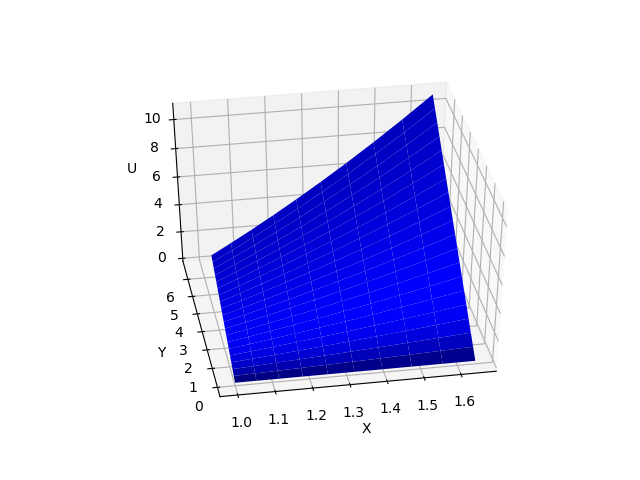

In [5]:
ODE.Draw3D(XL, YL, ZL, 40, 260, color="blue", Surf=True)
ODE.Save_Graphic('index19', 'eps')
ODE.Save_Graphic('index19', 'svg')

In [7]:
#Second example Initiate class
ODE1=MF_Solver_PDE()
#Initiate variables 
x,y,u,p,q=ODE1.get_Parametrs()
#Set eikonal equation
ODE1.initFunc( [p**2 + q**2 + x**2 + y**2 - 1, x**2+y**2-1<=0, p**2 + q**2 - 1, x**2+y**2-1>0], 2 )

In [8]:
tau=np.linspace(2, 0, 100)
t=np.linspace(-math.pi/2.1, math.pi/2.1, 41)
XL1, YL1, ZL1, PL1, QL1=ODE1.Solve3D([np.cos(t), np.sin(t), np.cos(t)], tau, dx=1, dy=0)

Initial values correspond to the surface 


<IPython.core.display.Javascript object>


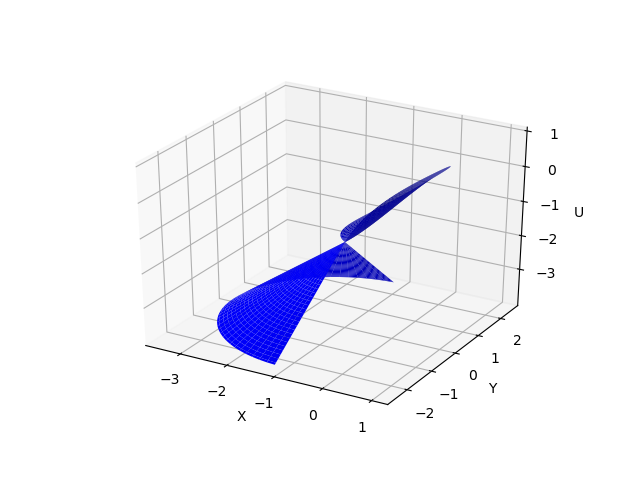

In [9]:
ODE1.Draw3D(XL1, YL1, ZL1)

<IPython.core.display.Javascript object>


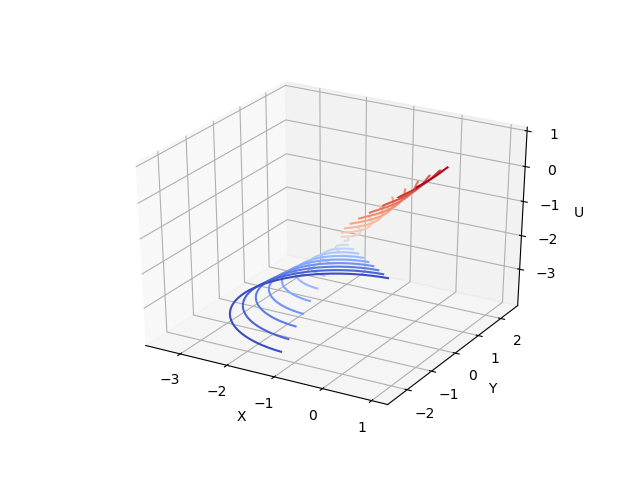

In [14]:
#Draw level lines
ODE1.Draw3D_level(XL1, YL1, ZL1, 20)

<IPython.core.display.Javascript object>


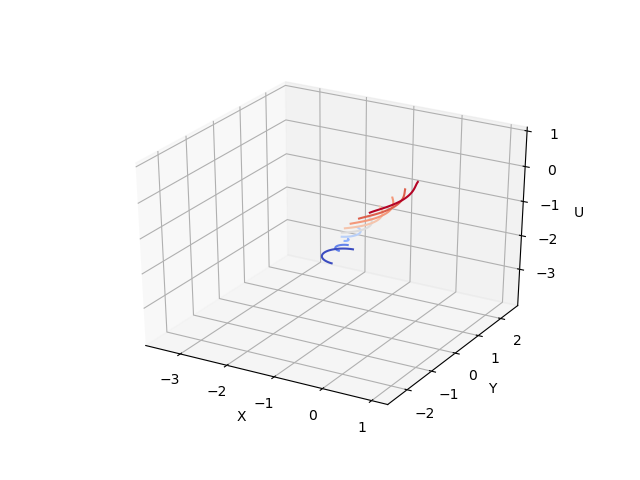

In [10]:
ODE1.Draw3D_level(XL1, YL1, ZL1, [-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0], False)